In [ ]:
# ---------------------------------
# JUDUL PROYEK: ANALISIS DATA PENJUALAN E-COMMERCE ABC
# OLEH: Muhammad Rizal Ibrahim
# ---------------------------------

# 1. LATAR BELAKANG
# Perusahaan E-commerce ABC ingin memahami perilaku pelanggan dan performa penjualan 
# untuk meningkatkan strategi marketing di kuartal berikutnya.

# 2. PERTANYAAN ANALISIS
# a. Produk apa yang paling banyak terjual?
# b. Kapan waktu yang disukai customer melakukan transaksi?
# c. Region mana yang memberikan kontribusi penjualan tertinggi?


In [2]:
# 3. IMPORT LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 4. DATA LOADING
# (Upload file .csv Anda ke Google Colab, lalu baca dengan Pandas)
df = pd.read_csv(r"C:\rijal\Data Analyst\Dataset\sales_and_customer_insights.csv")
df.info() # Lihat gambaran awal data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [9]:
df['Launch_Date'] = pd.to_datetime(df['Launch_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_ID               10000 non-null  object        
 1   Product_ID                10000 non-null  object        
 2   Transaction_ID            10000 non-null  object        
 3   Purchase_Frequency        10000 non-null  int64         
 4   Average_Order_Value       10000 non-null  float64       
 5   Most_Frequent_Category    10000 non-null  object        
 6   Time_Between_Purchases    10000 non-null  int64         
 7   Region                    10000 non-null  object        
 8   Churn_Probability         10000 non-null  float64       
 9   Lifetime_Value            10000 non-null  float64       
 10  Launch_Date               10000 non-null  datetime64[ns]
 11  Peak_Sales_Date           10000 non-null  object        
 12  Season             

In [41]:
# 5. DATA CLEANING
# (Cek missing values, ubah tipe data jika perlu)
df.isnull().sum()
# Contoh: Jika ada data tanggal yang masih object, ubah ke datetime
# df['order_date'] = pd.to_datetime(df['order_date'])

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [13]:
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [23]:
# 6. EXPLORATORY DATA ANALYSIS (EDA) & VISUALISASI
# Hitung total penjualan per KAtergoti
Kategori_terlaris = df.groupby('Most_Frequent_Category')['Purchase_Frequency'].sum().sort_values(ascending=False).head(10)
Kategori_terlaris

Most_Frequent_Category
Electronics    25740
Clothing       24858
Home           24520
Sports         24439
Name: Purchase_Frequency, dtype: int64

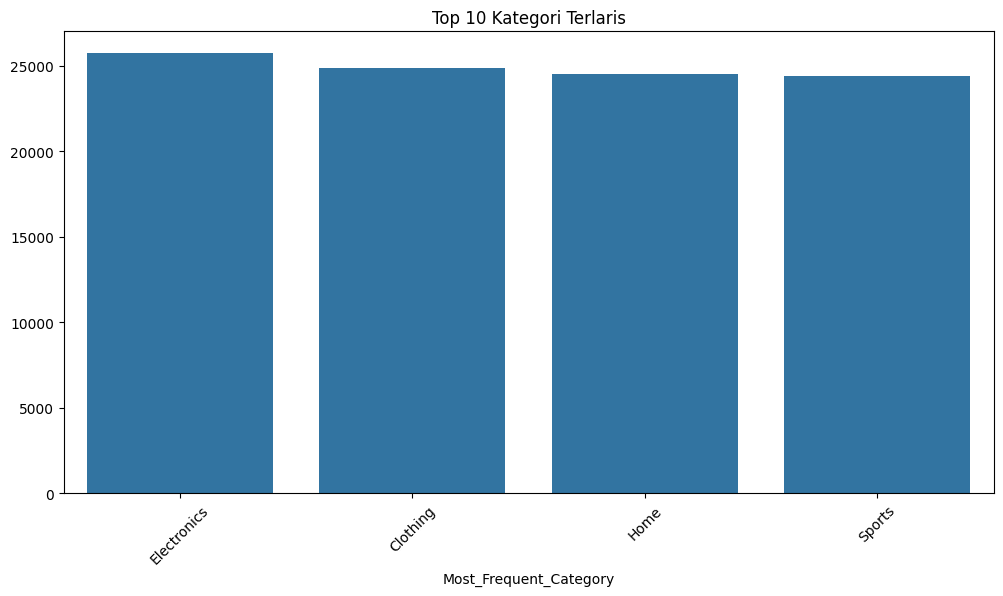

In [24]:
# Buat visualisasinya
plt.figure(figsize=(12, 6))
sns.barplot(x=Kategori_terlaris.index, y=Kategori_terlaris.values)
plt.title('Top 10 Kategori Terlaris')
plt.xticks(rotation=45)
plt.show()

# "Dari grafik di bawah, dapat dilihat bahwa Kategori Electronics, Clothing, Home dan Sports. Kategori yang diminati
# Oleh pelanggan adalah kategori electronic. Ini menunjukkan bahwa fokus promosi bisa diarahkan 
# pada produk-produk di kategori ini."

In [26]:
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [28]:
transaksi_waktu_favorite = df.groupby('Preferred_Purchase_Times')['Transaction_ID'].count()
transaksi_waktu_favorite

Preferred_Purchase_Times
Afternoon    3354
Evening      3433
Morning      3213
Name: Transaction_ID, dtype: int64

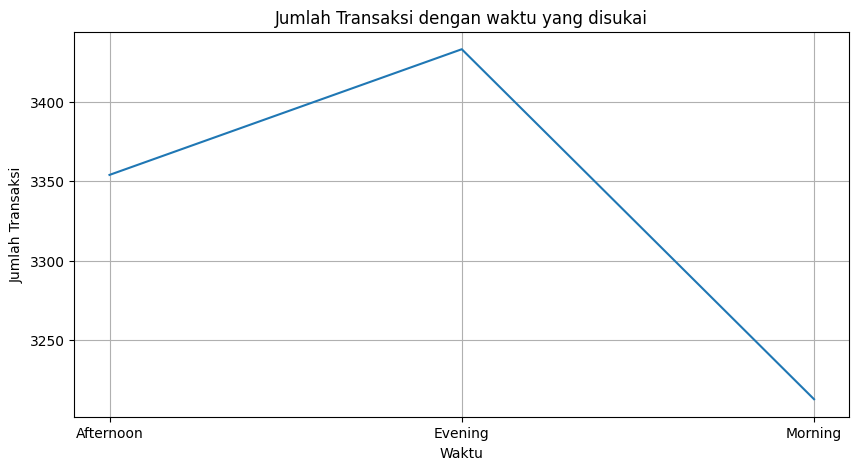

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=transaksi_waktu_favorite.index, y=transaksi_waktu_favorite.values)
plt.title('Jumlah Transaksi dengan waktu yang disukai')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

# Penjualan tertinggi terjadi pada waktu menuju malam hari. Ini bisa menjadi
# acuan waktu untuk mengirimkan notifikasi promo atau iklan.

In [33]:
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


In [34]:
transaksi_region = df.groupby('Region')['Transaction_ID'].count()
transaksi_region

Region
Asia             2472
Europe           2547
North America    2454
South America    2527
Name: Transaction_ID, dtype: int64

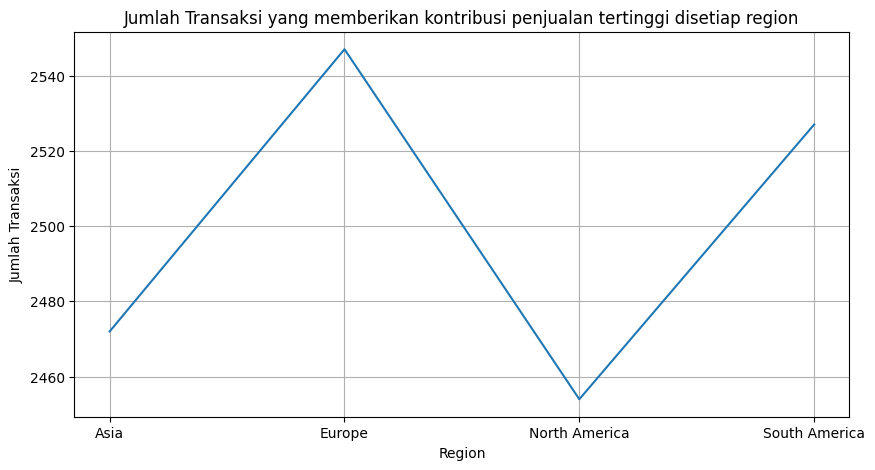

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=transaksi_region.index, y=transaksi_region.values)
plt.title('Jumlah Transaksi yang memberikan kontribusi penjualan tertinggi disetiap region')
plt.xlabel('Region')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

# Penjualan tertinggi dari setiap region paling tinggi terjadi pada region
# Europe dan South America. 

In [ ]:
# 7. KESIMPULAN & REKOMENDASI BISNIS

# KESIMPULAN:
# 1. Kategori Electronic adalah kategori yang paling populer dari kategori lainnya.
# 2. Waktu penjualan sering terjadi pada waktu malam hari, jika dikira-kira 18.00 - 23.59
# 3. Region Europe dan South America adalah 2 region dengan kontibusi penjualan terbesar secara signifikan.

# REKOMENDASI UNTUK TIM BISNIS:
# 1. Marketing: Lakukan promosi dengan penukaran "poin pembelian" untuk mendorong lebih banyak penjualan.
# 2. Manajemen Stok: Pastikan stok untuk produk-produk dari kategori electronic selalu aman, terutama di gudang yang melayani region Europe dan Soth america.
# 3. Ekspansi: Pertimbangkan untuk mengadakan event atau promosi khusus di region-region dengan penjualan tertinggi untuk meningkatkan loyalitas pelanggan.

In [38]:
strategi_penjualan = df.groupby('Retention_Strategy')['Transaction_ID'].count()
strategi_penjualan

Retention_Strategy
Discount           3277
Email Campaign     3359
Loyalty Program    3364
Name: Transaction_ID, dtype: int64

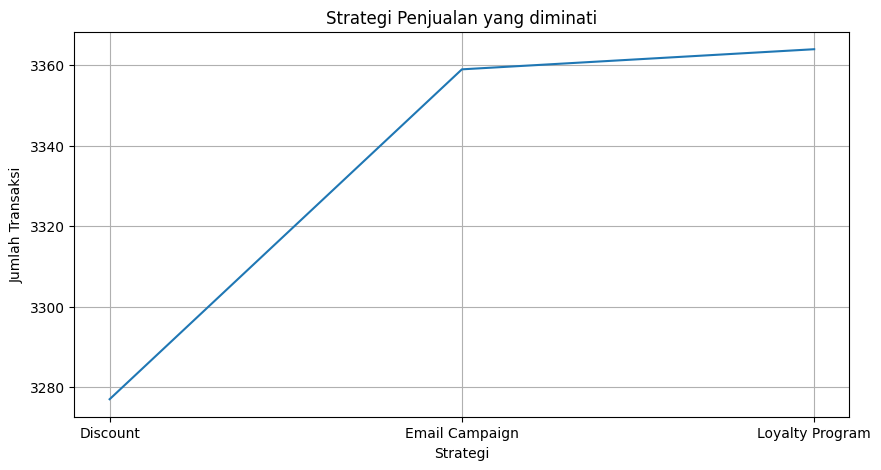

In [40]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=strategi_penjualan.index, y=strategi_penjualan.values)
plt.title('Strategi Penjualan yang diminati')
plt.xlabel('Strategi')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()